In [4]:
from pathlib import Path

In [2]:
from dew_gwdata import wilma_cache

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
plt.rcParams["figure.dpi"] = 100

In [23]:
x = wilma_cache.read_usage_csvs(wilma_cache.WILMA_DATA_FOLDER / "Usage*.csv")

In [41]:
docnos = """116116
180006
116113
180006""".splitlines()

In [42]:
docnos = [int(x) for x in docnos]

In [49]:
x[x.DOCNO.isin(docnos) & x.RESOURCETYPE.str.contains("Underground")]

,DOCNO,DOCSEQ,wateraccnt,sua,SOURCEID,SOURCEDESC,meterid,easting,northing,RESOURCETYPE,RESOURCEGROUP,AREA,YEAR,METERED,SUPPLIED1,ADJUSTMENT,deemed,EFFECTIVE,levy_year
1785,116116,0,,0,114179,6627-00679,085063-01,,,Underground,EMLR Currency Limestone GWMZ,Eastern Mt Lofty Ranges PWRA,2015,0,0,0,0,0,2015
1786,116116,0,,0,114189,6627-11056,079517,,,Underground,EMLR Currency Limestone GWMZ,Eastern Mt Lofty Ranges PWRA,2015,13279,0,0,0,13279,2015
1787,116116,0,,0,114184,6627-10978,079602,,,Underground,EMLR Currency Limestone GWMZ,Eastern Mt Lofty Ranges PWRA,2015,23596,0,0,0,23596,2015
1994,116113,0,,0,116910,6627-10698,190604,,,Underground,EMLR Currency Limestone GWMZ,Eastern Mt Lofty Ranges PWRA,2016,3220,0,0,0,3220,2016
1995,116116,0,,0,114179,6627-00679,085063-01,,,Underground,EMLR Currency Limestone GWMZ,Eastern Mt Lofty Ranges PWRA,2016,342,0,0,0,342,2016
1996,116116,0,,0,114189,6627-11056,079517,,,Underground,EMLR Currency Limestone GWMZ,Eastern Mt Lofty Ranges PWRA,2016,42320,0,0,0,42320,2016
1997,116116,0,,0,114184,6627-10978,079602,,,Underground,EMLR Currency Limestone GWMZ,Eastern Mt Lofty Ranges PWRA,2016,51273,0,0,0,51273,2016
2013,116113,1,,0,116909,6627-10658,N1H4040097,,,Underground,EMLR Currency Limestone GWMZ,Eastern Mt Lofty Ranges PWRA,2017,0,0,8094,0,8094,2017
2016,116113,1,,0,116910,6627-10698,190604,,,Underground,EMLR Currency Limestone GWMZ,Eastern Mt Lofty Ranges PWRA,2017,7780,0,46360,0,54140,2017
2017,116113,0,,0,116909,6627-10658,N1H4040097,,,Underground,EMLR Currency Limestone GWMZ,Eastern Mt Lofty Ranges PWRA,2017,8094,0,-8094,0,0,2017


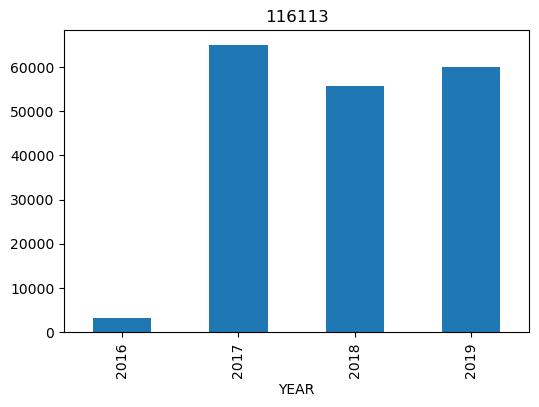

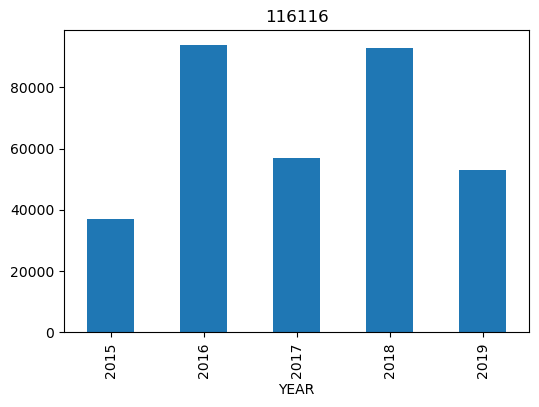

In [44]:
dfx = x[x.DOCNO.isin(docnos)].groupby(["DOCNO", "YEAR"]).EFFECTIVE.sum()
for lic, g in dfx.groupby("DOCNO"):
    fig = plt.figure()
    ax = fig.add_subplot()
    g.reset_index().set_index("YEAR").EFFECTIVE.plot.bar(ax=ax)
    ax.set_title(lic)